In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
np.random.seed(42)
import time

In [2]:
df = pd.read_csv("austin-animal-center-shelter-outcomes-and/aac_shelter_outcomes.csv")

In [3]:
df.shape

(78256, 12)

In [4]:
print(df.columns)
print(df.info())

Index([u'age_upon_outcome', u'animal_id', u'animal_type', u'breed', u'color',
       u'date_of_birth', u'datetime', u'monthyear', u'name',
       u'outcome_subtype', u'outcome_type', u'sex_upon_outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB
None


In [5]:
df.head(10)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,2014-12-13T12:20:00,NaN,Suffering,Euthanasia,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female


## Target variable definition - 

From the below count plot of Outcome Types, we notice that the "Adoption", "Transfer" and "Return to Owner" are the most common outcome types, comprising of 90% of the outcomes. Hence, for the scope of this project, we would be defining the target variable as below: 

'Adoption' = 1, if outcome_type == "Adoption"


'Adoption' = 0, if outcome_type == "Transfer" or outcome_type == "Return to Owner"

47% of our pets are adopted while the other 53% are not. 

We are not considering the other major outcome type "Euthanasia" as it is not relevant for the scope of this project. Here, we are only considering whether an animal will get adopted or transfered/returned. 

Adoption           42.312411
Transfer           30.028368
Return to Owner    18.342364
Euthanasia          7.769372
Died                0.868943
Disposal            0.392302
Rto-Adopt           0.191679
Missing             0.058781
Relocate            0.020446
Name: outcome_type, dtype: float64


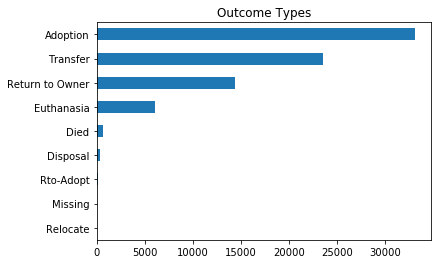

Adoption           46.659621
Transfer           33.113507
Return to Owner    20.226872
Name: outcome_type, dtype: float64


/Users/trestor/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


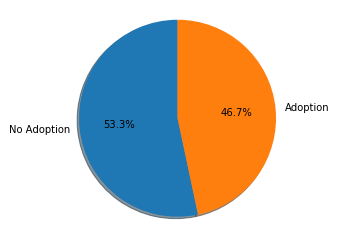

In [6]:
print(df['outcome_type'].value_counts()/df.shape[0]*100)
df['outcome_type'].value_counts().sort_values().plot(kind = 'barh', title = "Outcome Types")
plt.show()
#dropping other outcome types

keep_cond = (df['outcome_type'] == 'Adoption') | (df['outcome_type'] == 'Transfer') | (df['outcome_type'] == 'Return to Owner')

adoption_df = df[keep_cond]

#value_counts after dropping
print(adoption_df['outcome_type'].value_counts()/adoption_df.shape[0]*100)

target_cond = adoption_df['outcome_type'] == 'Adoption'
adoption_df['Adoption'] = np.where(target_cond, 1, 0)

labels = 'No Adoption', 'Adoption'
sizes = [adoption_df['Adoption'].value_counts()[0], adoption_df['Adoption'].value_counts()[1]]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Missing value analysis - 

The "outcome_subtype" and "name" column seem to have the most missing values, for the scope of this project, we will be dropping these variables and the other columns with missing observations. "outcome_subtype" feature is only used to describe the reason of the outcome, and can't drive the outcome. Hence, it is reasonable to drop it. Although "name" might be important in special cases, dropping it due to it's high cardinality. 

In [7]:
print(adoption_df.isnull().sum().sort_values(ascending = False))

try:
    adoption_df.drop(['outcome_subtype', 'name'], axis=1, inplace=True)
except:
    pass

adoption_df = adoption_df.dropna()

adoption_df.head(10)

outcome_subtype     41540
name                18407
age_upon_outcome        2
sex_upon_outcome        1
Adoption                0
outcome_type            0
monthyear               0
datetime                0
date_of_birth           0
color                   0
breed                   0
animal_type             0
animal_id               0
dtype: int64


/Users/trestor/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_type,sex_upon_outcome,Adoption
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,Transfer,Intact Male,0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Transfer,Spayed Female,0
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,Adoption,Neutered Male,1
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Transfer,Neutered Male,0
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,Transfer,Intact Male,0
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,Transfer,Spayed Female,0
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Adoption,Intact Female,1
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,Adoption,Spayed Female,1
10,1 year,A675405,Cat,Domestic Medium Hair Mix,Black/White,2013-03-27T00:00:00,2014-03-28T14:55:00,2014-03-28T14:55:00,Return to Owner,Spayed Female,0
11,2 years,A673652,Dog,Papillon/Border Collie,Black/White,2012-02-28T00:00:00,2014-03-28T14:39:00,2014-03-28T14:39:00,Transfer,Neutered Male,0


## Dropping insignificant variables - 

We need to drop the variables that are not predictive of adoption. We will be dropping the "animal_id" variable. The 
"datetime" and "monthyear" variables are equivalent and are timestamp variables. The "age_upon_outcome"
variable captures the difference between the "date_of_birth" and "monthyear" variables. For ease of computation we would be computing our own continuous age variable 'days_of_age'. Hence, we would be dropping these variables. Also, dropping 'outcome_type' variable, as we have created 'Adoption' target variable. 

In [8]:
adoption_df['date_of_birth'] = pd.to_datetime(adoption_df['date_of_birth'], format='%Y-%m-%d')
adoption_df['datetime'] = pd.to_datetime(adoption_df['datetime'], format='%Y-%m-%d')

adoption_df['days_of_age'] =  (adoption_df['datetime'] - adoption_df['date_of_birth']).dt.days

try:
    adoption_df.drop(['animal_id', 'datetime', 'monthyear', 'date_of_birth','outcome_type','age_upon_outcome'], axis=1, inplace=True)
except:
    pass

In [9]:
print(adoption_df.columns)
#print(adoption_df[adoption_df['animal_type'] == 'Cat'].groupby(['color'])[['Adoption']].sum().sort_values(by='Adoption', ascending=False))

Index([u'animal_type', u'breed', u'color', u'sex_upon_outcome', u'Adoption',
       u'days_of_age'],
      dtype='object')


## Exploratory analysis

    1. What dog breeds are adopted more? 

    Pitbull mix and Labrador retriever mix are adopted the most. There are 1,862 different dog breeds in the dataset. 

    2. What animal types are adopted more? 

    Birds, cats and dogs are adopted the most. 

    3. Relation between sex of the animal and adoption? 

    Intact animals are less likely to get adopted. 

    4. Relation between age of the animal and adoption? 

    Younger animals tend to be the most adopted. 

In [10]:
# breed=adoption_df[adoption_df['animal_type'] == 'Dog'].groupby(['breed'])[['Adoption']].sum().reset_index().sort_values(by='Adoption', ascending=False)
# breed_10=breed.head(10)
# # Bar plot
# fig = plt.figure(figsize=(8,10))
# sns.barplot('Adoption','breed',
#                  data=breed_10, palette='husl', linewidth=0.7, edgecolor='k')  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
# plt.ylabel('Dog Breed', fontsize=14)
# plt.xlabel('Count', fontsize=14)
# plt.title('Top 10 adopted dog breeds', fontsize=15)
# for i,j in enumerate(breed_10['breed']):
#     ax.text(.9,i,j,weight='bold',fontsize=14)
# plt.grid(True,alpha= .3);

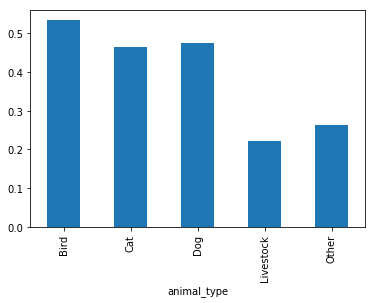

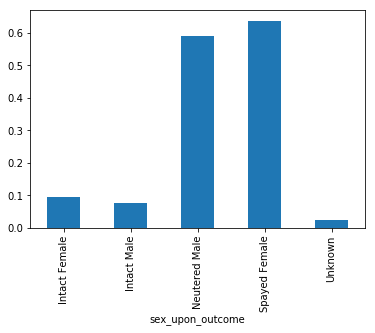

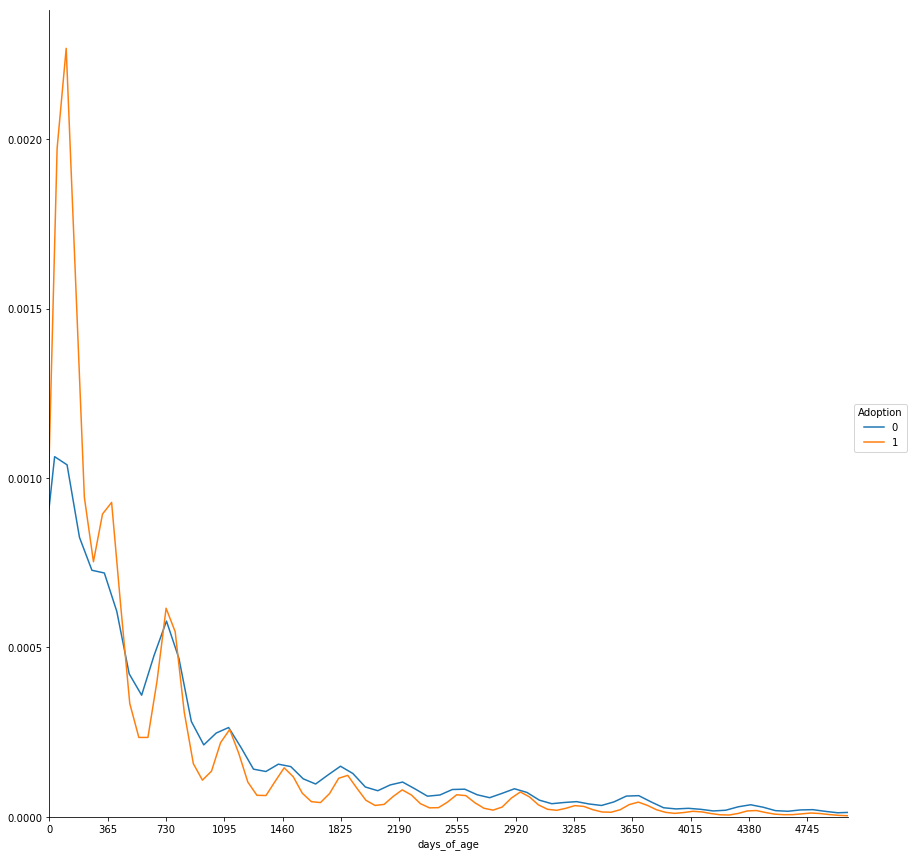

In [11]:
adoption_df.groupby(['animal_type']).mean()['Adoption'].plot.bar(stacked=True)
plt.show()
adoption_df.groupby(['sex_upon_outcome']).mean()['Adoption'].plot.bar(stacked=True)
plt.show()
g = sns.FacetGrid(adoption_df, hue="Adoption", size=12)
g.map(sns.kdeplot, "days_of_age") 
g.add_legend()
g.set(xlim=(0,5000), xticks=range(0,5000,365))
plt.show(g)

## Feature engineering - Encoding the categorical variables

We would be encoding all our categorical variables. Label encoding is chosen as it converts the categorical variables
to numeric type, without increasing the dimensionality of the dataset. 

In [12]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['animal_type', 'breed', 'color', 'sex_upon_outcome']
for col in cat_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(adoption_df[col])
    adoption_df[col] = label_encoder.transform(adoption_df[col])
    if col == 'animal_type' or col == 'sex_upon_outcome':
        print(range(len(adoption_df[col].value_counts())))
        print(list(label_encoder.inverse_transform(range(len(adoption_df[col].value_counts())))))

adoption_df.head(10)

[0, 1, 2, 3, 4]
['Bird', 'Cat', 'Dog', 'Livestock', 'Other']
[0, 1, 2, 3, 4]
['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']


,animal_type,breed,color,sex_upon_outcome,Adoption,days_of_age
0,1,914,312,1,0,15
1,2,250,458,3,0,366
2,2,1569,115,2,1,429
3,2,1430,447,2,0,3300
5,2,1311,177,1,0,126
7,2,643,118,3,0,1111
8,1,914,90,0,1,59
9,1,914,449,3,1,95
10,1,909,55,3,0,366
11,2,1508,55,2,0,759


## Model building - 

The process we will be using to build a ML model is as follows:
    
1. Split data into train/test 70/30. We will use stratified sampling to ensure the same distribution between train and test dataset. 
2. Build a Random Forest and Gradient boosting models on the train dataset and evaluate accuracy on the test dataset
3. Depending on which performs better, tune it's parameters further for optimal performance

### 1. Train/test split

In [13]:
from sklearn.model_selection import train_test_split
X = adoption_df.drop('Adoption', axis=1)
y = adoption_df['Adoption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

### 2. Gradient boosting outperforms Random Forest model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.75      0.78      0.76     11355
          1       0.73      0.71      0.72      9934

avg / total       0.74      0.74      0.74     21289



In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print(classification_report(y_test, gb_pred))

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     11355
          1       0.74      0.77      0.75      9934

avg / total       0.77      0.77      0.77     21289



In [16]:
## Conclusion - Baseline Gradient boosting outperforms Baseline Random forest, so we would be tuning the Gradient boosting model further

print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, gb_pred))

0.744938700737
0.767109775001


In [17]:
#Current hyper-parameters of the Gradient boosting model
gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

## 3. Further tuning the Gradient boosting model using grid search cross validation

In [18]:
from sklearn.model_selection import GridSearchCV

if not os.path.exists('gb_final.sav'):
    gb_grid = GradientBoostingClassifier()
    parameters = {
        'max_depth': range (2, 8, 2),
        'n_estimators': range(100, 300, 100),
        'learning_rate': [0.1, 0.3],
        'min_impurity_split': [0, 50, 100]
    }
    start = time.time()
    grid = GridSearchCV(
        estimator=gb_grid,
        param_grid=parameters,
        scoring = 'accuracy',
        n_jobs = 10,
        cv = 3,
        verbose=True
    )

    grid.fit(X_train, y_train)

    print("Time taken = ", time.time() - start)
    
    gb_final = grid.best_estimator_
    
    ## Saving model to disk for future use
    filename = 'gb_final.sav'
    pickle.dump(gb_final, open(filename, 'wb'))

else:
    gb_final = pickle.load(open('gb_final.sav', 'rb'))

In [19]:
gb_final_pred = gb_final.predict(X_test)

print(classification_report(y_test, gb_final_pred))
print(accuracy_score(y_test, gb_final_pred))

             precision    recall  f1-score   support

          0       0.83      0.75      0.79     11355
          1       0.74      0.82      0.78      9934

avg / total       0.79      0.78      0.78     21289

0.782939546245


In [20]:
## Final hyper-parameters

gb_final

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=50, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

## Conclusion - Tuning the Gradient boosting model improves the accuracy by 1.6%

## Model evaluation

## 1. Feature importance - As observed from Exploratory analysis section, the "days_of_age" feature is the most important to the model

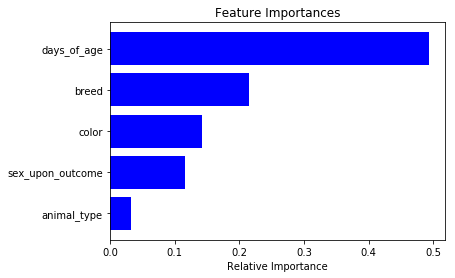

In [21]:
features = X_train.columns
importances = gb_final.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 2. Inspecting model using one way and two way PDPs

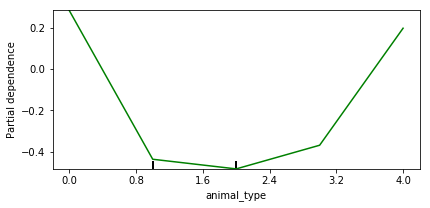

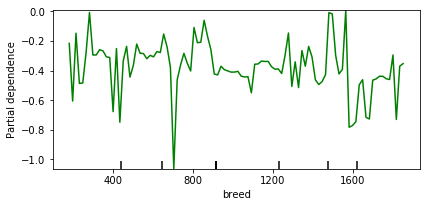

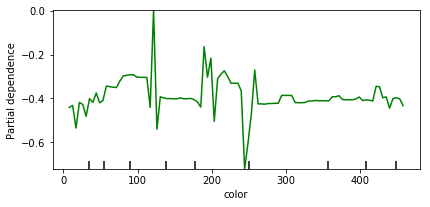

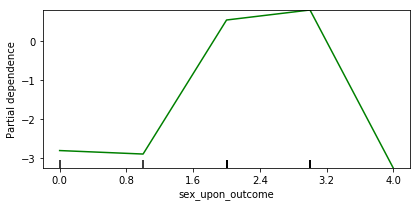

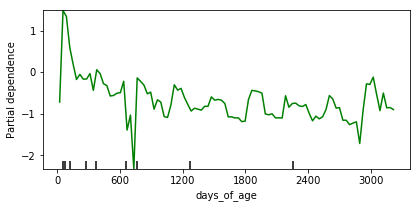

In [22]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# Here we make the plot
for i in range(5):
    plots = plot_partial_dependence(gb_final,       
                                       features=[i], # column numbers of plots we want to show
                                       X=X_train,            # raw predictors data.
                                       feature_names=X_train.columns, # labels on graphs
                                       grid_resolution=100) # number of values to plot on x axis

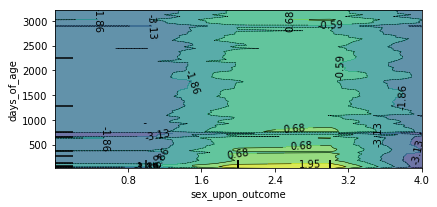

In [23]:
plots = plot_partial_dependence(gb_final,       
                                   features=[(3,4)], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=X_train.columns, # labels on graphs
                                   grid_resolution=100) # number of values to plot on x axis

## Interpreting the output of PDP, below are the label encodings:

[0, 1, 2, 3, 4]

['Bird', 'Cat', 'Dog', 'Livestock', 'Other']

[0, 1, 2, 3, 4]

['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']

## As expected, Neutered/Spayed animals have higher adoption rates than intact animals. 

## Also, younger animals have higher adoption rates. 